## **<font color='purple'>Detecção de anomalias nos acessos ao blog Cinetour-Viagem de Cinema usando PyCaret</font>**

## **<font color='orange'>Part 1 - Libraries, Dataset & Data Understanding</font>**

### **<font color='orangered'>Libraries and dataset</font>**

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import datetime
from datetime import datetime, timedelta, date
from pycaret.anomaly import *

In [2]:
# Dataset (period: from 01/06/22 to 30/04/23)
df = pd.read_csv('VC_ST_dia.csv', sep=';')
df.head(1)

date  access  day  month  year week_day
0  01/06/2022      74    1      6  2022      Wed

In [3]:
df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y")
df.sort_values(["date"], ascending = (True))
df.head()

date  access  day  month  year week_day
0 2022-06-01      74    1      6  2022      Wed
1 2022-06-02     129    2      6  2022      Thu
2 2022-06-03     189    3      6  2022      Fri
3 2022-06-04     196    4      6  2022      Sat
4 2022-06-05      74    5      6  2022      Sun

### **<font color='orangered'>Data exploration & statistics</font>**

In [4]:
# Statistics
df['access'].describe()

count     334.000000
mean      176.413174
std       107.634837
min        49.000000
25%       118.250000
50%       160.500000
75%       213.000000
max      1543.000000
Name: access, dtype: float64

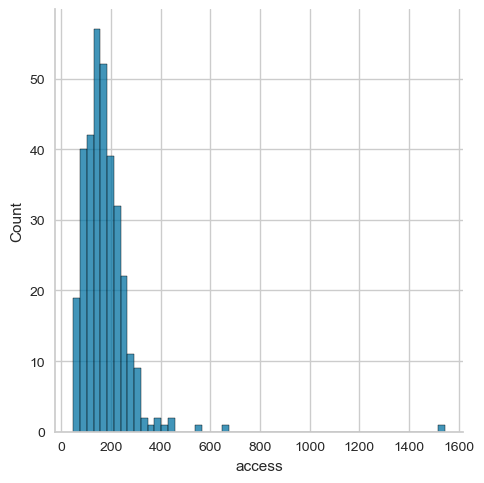

In [5]:
# Data distribution (mean = 176.41 & Median = 160.50)
sns.displot(x=df['access'])

<AxesSubplot:xlabel='access'>

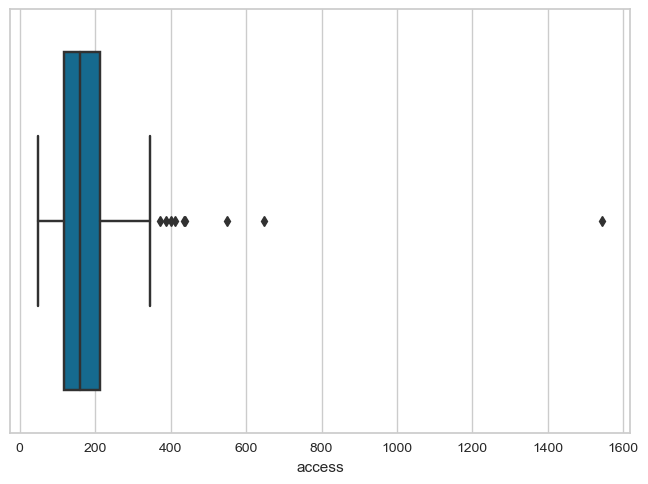

In [6]:
# Boxplot of total data
sns.boxplot(x=df['access'])

<AxesSubplot:xlabel='day', ylabel='access'>

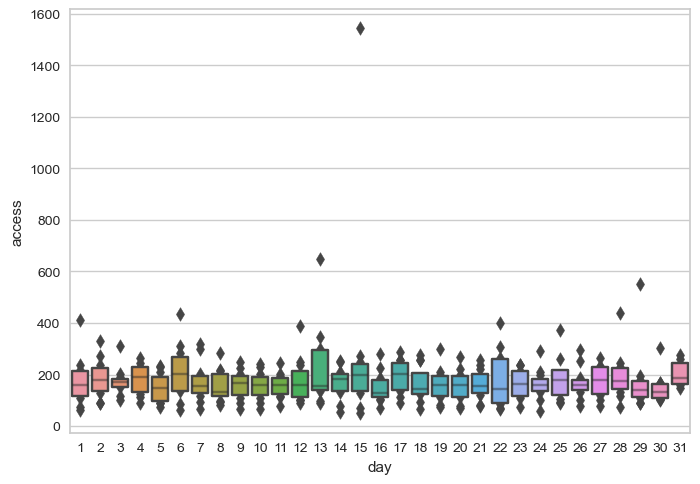

In [7]:
# Boxenplot per day
sns.boxenplot(y=df['access'], x=df['day'])

<AxesSubplot:xlabel='week_day', ylabel='access'>

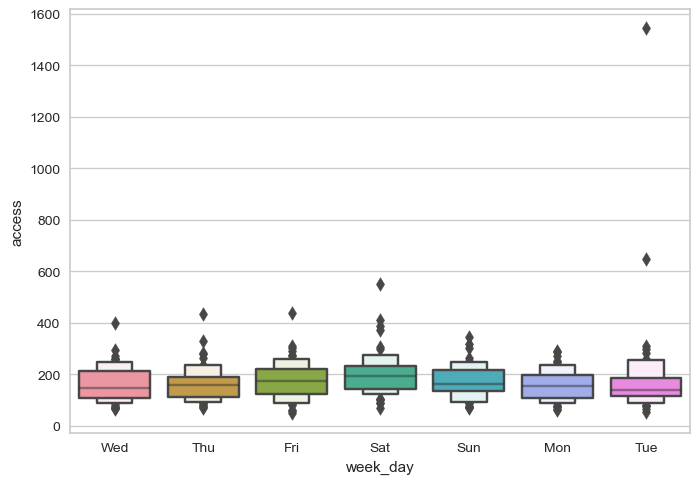

In [8]:
# Boxenplot per week day
sns.boxenplot(y=df['access'], x=df['week_day'])

<AxesSubplot:xlabel='month', ylabel='access'>

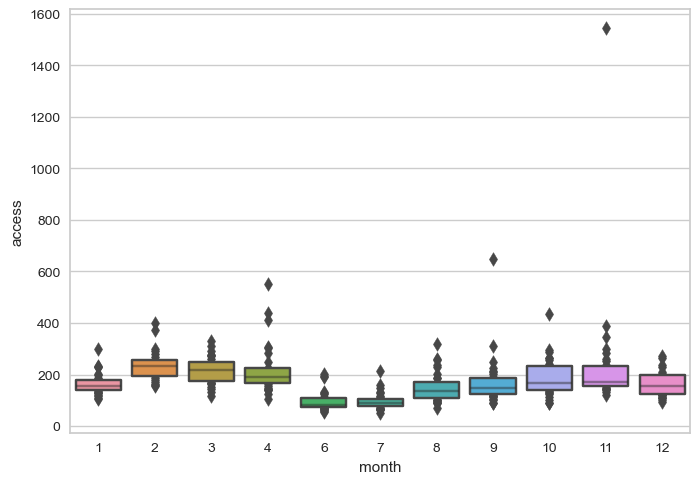

In [9]:
# Boxenplot per month
sns.boxenplot(y=df['access'], x=df['month'])

<AxesSubplot:xlabel='year', ylabel='access'>

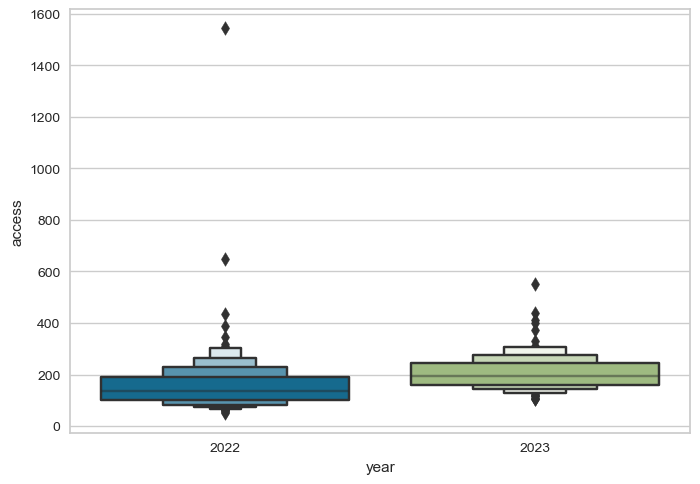

In [10]:
# Boxenplot per year
sns.boxenplot(y=df['access'], x=df['year'])

## **<font color='orange'>Part 2 - Anomaly Detection Models & Visualizations</font>**

In [11]:
# Preprocessing
anom_exp = setup(df, normalize = True, session_id = 1, numeric_features= ['access', 'day'])

In [12]:
# Models by PyCaret
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

**The models used here are:**
- Histogram-based Outlier Detection	
- Isolation Forest
- K-Nearest Neighbors Detector and
- Local Outlier Factor

### **<font color='orangered'>Histogram Model to Detect Outliers</font>**

In [13]:
# Creating the model
hist = create_model('histogram')
print(hist)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

HBOS(alpha=0.1, contamination=0.05, n_bins=10, tol=0.5)


In [14]:
# Assigning this model
hist_results = assign_model(hist)
anomalies_hist_access = hist_results.sort_values(["access"], ascending = (False))
anomalies_hist_access.head(1)

date  access  day  month  year week_day  Anomaly  Anomaly_Score
167 2022-11-15    1543   15     11  2022      Tue        0      -5.294634

In [15]:
hist_results.rename(columns = {"Anomaly" : "Hist_Class", "Anomaly_Score" : "Hist_Score"}, inplace = True)
hist_results.head(1)

date  access  day  month  year week_day  Hist_Class  Hist_Score
0 2022-06-01      74    1      6  2022      Wed           0    -6.21426

In [16]:
anomalies_hist_score = hist_results.sort_values(["Hist_Score"], ascending = (False))
anomalies_hist_score.head(1)

date  access  day  month  year week_day  Hist_Class  Hist_Score
331 2023-04-28     437   28      4  2023      Fri           1   -1.401008

In [17]:
# Quantity of outliers
hist_results['Hist_Class'].value_counts()

0    319
1     15
Name: Hist_Class, dtype: int64

In [18]:
hist_results[hist_results['Hist_Class'] == 1].shape

(15, 8)

In [19]:
hist_outliers = hist_results[hist_results['Hist_Class'] == 1]
hist_outliers_date = hist_outliers.sort_values(["access"], ascending = (False))
hist_outliers_date.head(15)

date  access  day  month  year week_day  Hist_Class  Hist_Score
104 2022-09-13     648   13      9  2022      Tue           1   -3.647995
332 2023-04-29     550   29      4  2023      Sat           1   -2.326470
331 2023-04-28     437   28      4  2023      Fri           1   -1.401008
304 2023-04-01     411    1      4  2023      Sat           1   -2.222221
325 2023-04-22     308   22      4  2023      Sat           1   -3.664016
285 2023-03-13     291   13      3  2023      Mon           1   -3.706320
309 2023-04-06     284    6      4  2023      Thu           1   -3.664016
278 2023-03-06     249    6      3  2023      Mon           1   -3.706320
330 2023-04-27     227   27      4  2023      Thu           1   -2.842802
324 2023-04-21     220   21      4  2023      Fri           1   -3.664016
328 2023-04-25     219   25      4  2023      Tue           1   -3.635574
326 2023-04-23     213   23      4  2023      Sun           1   -3.664016
310 2023-04-07     202    7      4  2023      Fri           1   -3.664016
286 2023-03-14     199   14      3  2023      Tue           1   -3.706320
318 2023-04-15     199   15      4  2023      Sat           1   -3.664016

In [20]:
# Crosstab results
x = pd.crosstab(hist_results["Hist_Class"], hist_results["day"])
x

day         1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  \
Hist_Class                                          ...                       
0           10  11  11  11  11   9  10  11  11  11  ...  10  10  11  10  11   
1            1   0   0   0   0   2   1   0   0   0  ...   1   1   0   1   0   

day         27  28  29  30  31  
Hist_Class                      
0           10  10   9  10   6  
1            1   1   1   0   0  

[2 rows x 31 columns]

<AxesSubplot:xlabel='day', ylabel='access'>

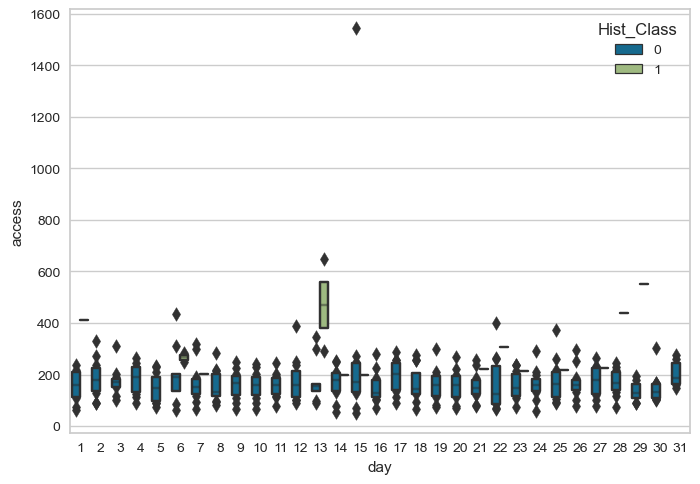

In [21]:
# Data viz per day
sns.boxenplot(data=hist_results, y='access', x='day', hue='Hist_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

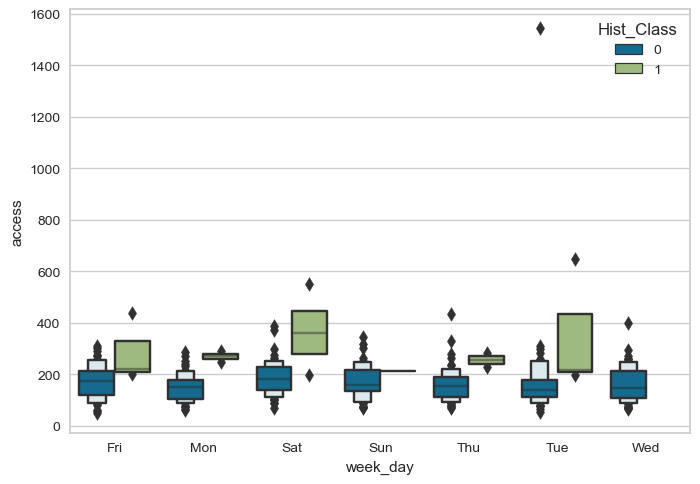

In [22]:
# Data viz per week day
sns.boxenplot(data=hist_results, y='access', x='week_day', hue='Hist_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

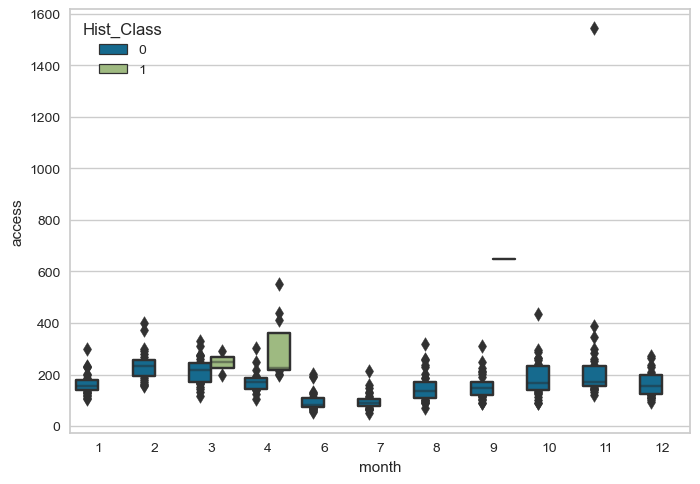

In [23]:
# Data Viz per month
sns.boxenplot(data=hist_results, y='access', x='month', hue='Hist_Class')

In [24]:
plot_model(hist, plot = 'tsne', feature = 'day')

### **<font color='orangered'>Isolation Forest</font>**

In [25]:
## Creating & assigning the model
iforest = create_model('iforest', fraction=0.05, n_estimators = 800)
iforest_results=assign_model(iforest)
anomalies_iforest_access = iforest_results.sort_values(["access"], ascending = (False))
anomalies_iforest_access.head(1)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

date  access  day  month  year week_day  Anomaly  Anomaly_Score
167 2022-11-15    1543   15     11  2022      Tue        1       0.053078

In [26]:
iforest_results.rename(columns = {"Anomaly" : "iforest_Class", "Anomaly_Score" : "iforest_Score"}, inplace = True)
iforest_results.head(1)

date  access  day  month  year week_day  iforest_Class  iforest_Score
0 2022-06-01      74    1      6  2022      Wed              0      -0.012793

In [27]:
#Display the top ten results after sorting values
anomalies_iforest_score = iforest_results.sort_values(["iforest_Score"], ascending = (False))
anomalies_iforest_score.head(1)

date  access  day  month  year week_day  iforest_Class  \
167 2022-11-15    1543   15     11  2022      Tue              1   

     iforest_Score  
167       0.053078

In [28]:
# Quantity of outliers
iforest_results['iforest_Class'].value_counts()

0    317
1     17
Name: iforest_Class, dtype: int64

In [29]:
iforest_results[iforest_results['iforest_Class'] == 1].shape

(17, 8)

In [30]:
iforest_outliers = iforest_results[iforest_results['iforest_Class'] == 1]
iforest_outliers_date = iforest_outliers.sort_values(["access"], ascending = (False))
iforest_outliers_date.head(17)

date  access  day  month  year week_day  iforest_Class  \
167 2022-11-15    1543   15     11  2022      Tue              1   
332 2023-04-29     550   29      4  2023      Sat              1   
331 2023-04-28     437   28      4  2023      Fri              1   
304 2023-04-01     411    1      4  2023      Sat              1   
266 2023-02-22     401   22      2  2023      Wed              1   
274 2023-03-02     330    2      3  2023      Thu              1   
333 2023-04-30     303   30      4  2023      Sun              1   
303 2023-03-31     276   31      3  2023      Fri              1   
184 2022-12-02     272    2     12  2022      Fri              1   
217 2023-01-04     230    4      1  2023      Wed              1   
216 2023-01-03     173    3      1  2023      Tue              1   
244 2023-01-31     167   31      1  2023      Tue              1   
215 2023-01-02     159    2      1  2023      Mon              1   
214 2023-01-01     159    1      1  2023      Sun              1   
243 2023-01-30     150   30      1  2023      Mon              1   
240 2023-01-27     130   27      1  2023      Fri              1   
183 2022-12-01     109    1     12  2022      Thu              1   

     iforest_Score  
167       0.053078  
332       0.048026  
331       0.026553  
304       0.038193  
266       0.006153  
274       0.007918  
333       0.015475  
303       0.004079  
184       0.007225  
217       0.000015  
216       0.004709  
244       0.013986  
215       0.008990  
214       0.013730  
243       0.008387  
240       0.001999  
183       0.002683

In [31]:
#use crosstab to understand the breakdown of status types
x = pd.crosstab(iforest_results["iforest_Class"], iforest_results["day"])
x

day            1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  \
iforest_Class                                          ...                   
0               8   8  10  10  11  11  11  11  11  11  ...  10  11  11  11   
1               3   3   1   1   0   0   0   0   0   0  ...   1   0   0   0   

day            26  27  28  29  30  31  
iforest_Class                          
0              11  10  10   9   8   4  
1               0   1   1   1   2   2  

[2 rows x 31 columns]

<AxesSubplot:xlabel='day', ylabel='access'>

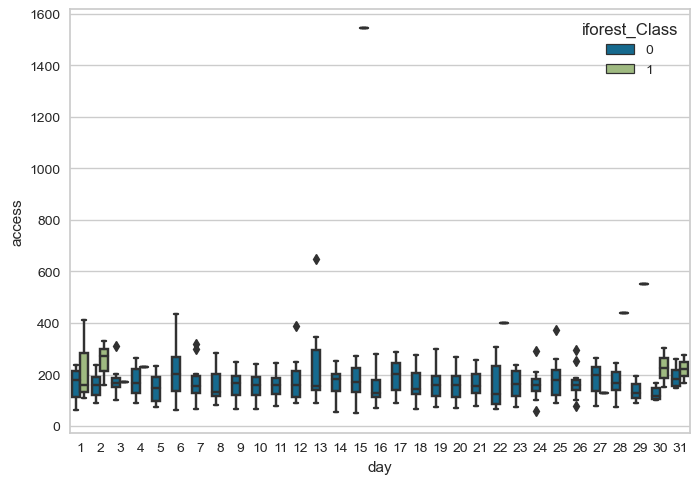

In [32]:
sns.boxplot(data=iforest_results, y='access', x='day', hue='iforest_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

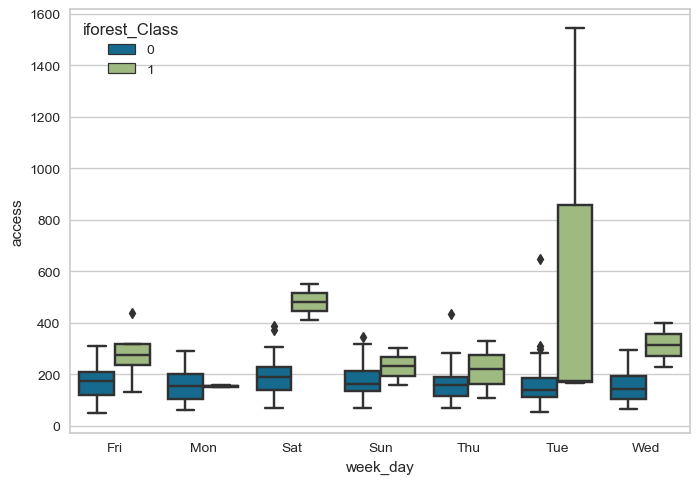

In [33]:
sns.boxplot(data=iforest_results, y='access', x='week_day', hue='iforest_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

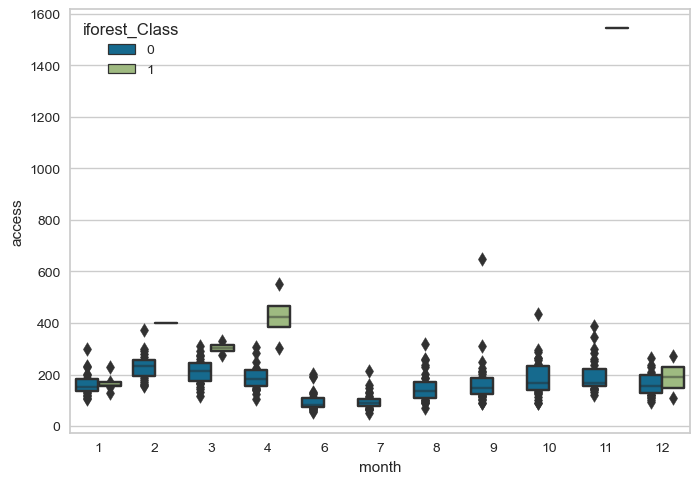

In [34]:
sns.boxenplot(data=iforest_results, y='access', x='month', hue='iforest_Class')

In [35]:
plot_model(iforest, plot = 'tsne'  , feature = 'day')

### **<font color='orangered'>K Nearest Neighbours (K-NN)</font>**

In [36]:
## Creating & assigning the model
knn = create_model('knn', fraction = 0.05, n_neighbors = 10, radius=2.0)
knn_results = assign_model(knn)
anomalies_knn_access = knn_results.sort_values(["access"], ascending = (False))
anomalies_knn_access.head(1)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

date  access  day  month  year week_day  Anomaly  Anomaly_Score
167 2022-11-15    1543   15     11  2022      Tue        1      12.197991

In [37]:
knn_results.rename(columns = {"Anomaly" : "KNN_Class", "Anomaly_Score" : "KNN_Score"}, inplace = True)
knn_results.head(1)

date  access  day  month  year week_day  KNN_Class  KNN_Score
0 2022-06-01      74    1      6  2022      Wed          0   2.493615

In [38]:
knn_anomalies = knn_results.sort_values(["KNN_Score", "date"], ascending = (False, False))
knn_anomalies.head(1)

date  access  day  month  year week_day  KNN_Class  KNN_Score
167 2022-11-15    1543   15     11  2022      Tue          1  12.197991

In [39]:
# Quantity of outliers
knn_results['KNN_Class'].value_counts()

0    317
1     17
Name: KNN_Class, dtype: int64

In [40]:
#Examine the anomalous dataset
knn_anomalies = knn_results[knn_results['KNN_Class'] == 1]
knn_anomalies.shape

(17, 8)

In [41]:
knn_outliers = knn_results[knn_results['KNN_Class'] == 1]
knn_outliers_date = knn_outliers.sort_values(["access"], ascending = (False))
knn_outliers_date.head(17)

date  access  day  month  year week_day  KNN_Class  KNN_Score
167 2022-11-15    1543   15     11  2022      Tue          1  12.197991
104 2022-09-13     648   13      9  2022      Tue          1   4.971862
332 2023-04-29     550   29      4  2023      Sat          1   4.169382
331 2023-04-28     437   28      4  2023      Fri          1   3.334190
127 2022-10-06     436    6     10  2022      Thu          1   3.112846
304 2023-04-01     411    1      4  2023      Sat          1   3.220829
266 2023-02-22     401   22      2  2023      Wed          1   3.019624
274 2023-03-02     330    2      3  2023      Thu          1   3.206284
275 2023-03-03     310    3      3  2023      Fri          1   3.031254
333 2023-04-30     303   30      4  2023      Sun          1   2.970006
303 2023-03-31     276   31      3  2023      Fri          1   3.013895
216 2023-01-03     173    3      1  2023      Tue          1   3.005610
301 2023-03-29     164   29      3  2023      Wed          1   3.039296
215 2023-01-02     159    2      1  2023      Mon          1   3.013895
214 2023-01-01     159    1      1  2023      Sun          1   2.946872
243 2023-01-30     150   30      1  2023      Mon          1   3.137358
302 2023-03-30     143   30      3  2023      Thu          1   3.012516

In [42]:
x = pd.crosstab(knn_results["KNN_Class"], knn_results["day"])
x

day        1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  \
KNN_Class                                          ...                       
0           9   9   9  11  11  10  11  11  11  11  ...  10  11  11  11  11   
1           2   2   2   0   0   1   0   0   0   0  ...   1   0   0   0   0   

day        27  28  29  30  31  
KNN_Class                      
0          11  10   8   7   5  
1           0   1   2   3   1  

[2 rows x 31 columns]

<AxesSubplot:xlabel='day', ylabel='access'>

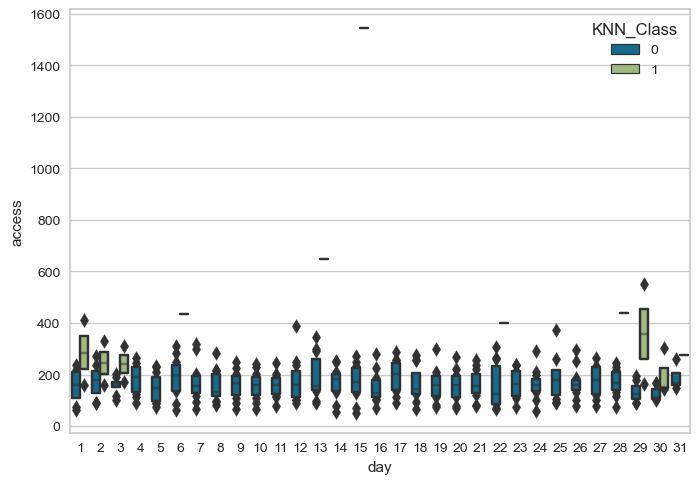

In [43]:
sns.boxenplot(data=knn_results, y='access', x='day', hue='KNN_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

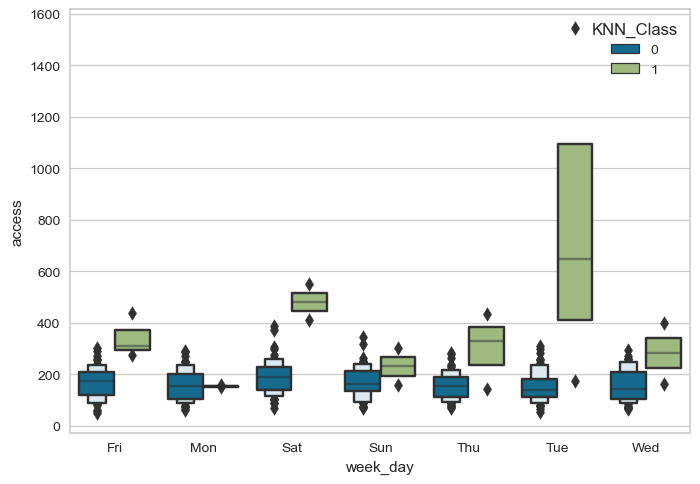

In [44]:
sns.boxenplot(data=knn_results, y='access', x='week_day', hue='KNN_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

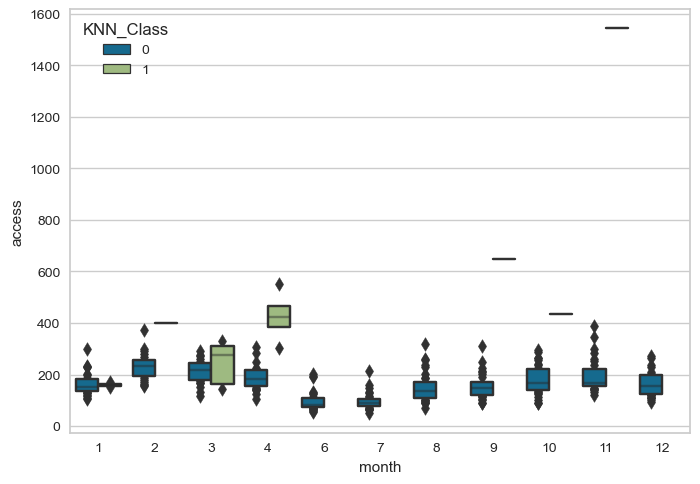

In [45]:
sns.boxenplot(data=knn_results, y='access', x='month', hue='KNN_Class')

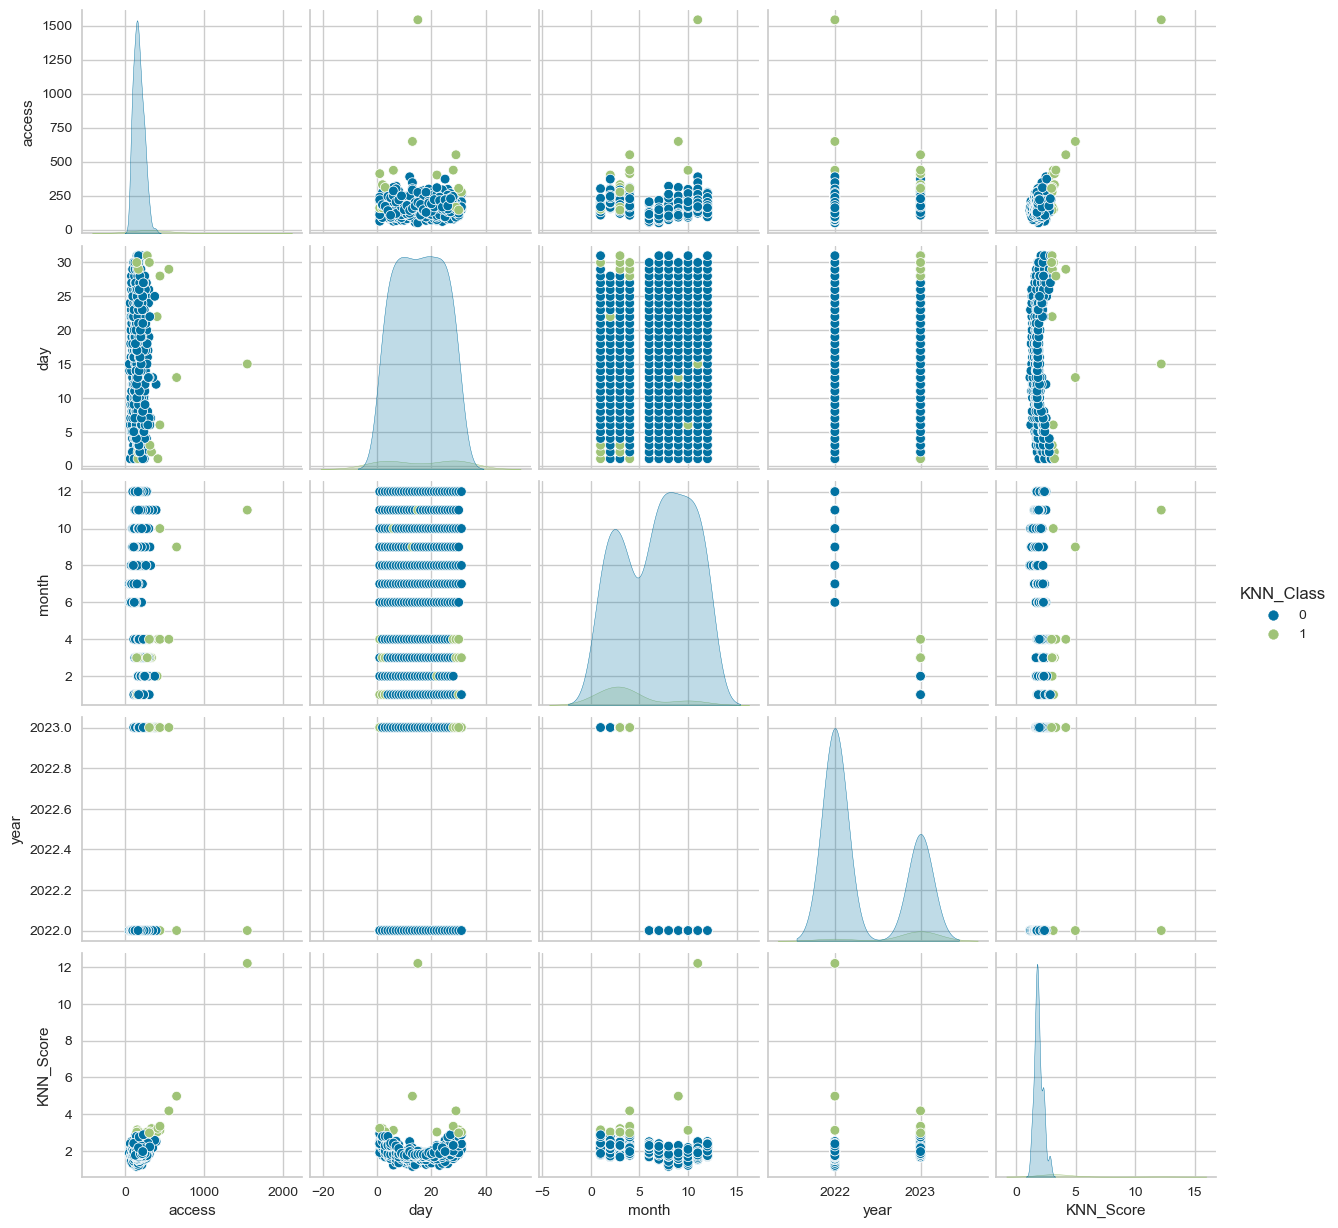

In [46]:
sns.pairplot(data=knn_results, hue='KNN_Class')

In [47]:
plot_model(knn, plot = 'tsne'  , feature = 'day')

### **<font color='orangered'>Local Outlier Factor (LOF)</font>**

In [48]:
## Creating & assigning the model
lof = create_model('lof', leaf_size=20)
lof_results=assign_model(lof)
anomalies_lof_access = lof_results.sort_values(["access"], ascending = (False))
anomalies_lof_access.head(1)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

date  access  day  month  year week_day  Anomaly  Anomaly_Score
167 2022-11-15    1543   15     11  2022      Tue        1       3.841255

In [49]:
lof_results.rename(columns = {"Anomaly" : "LOF_Class", "Anomaly_Score" : "LOF_Score"}, inplace = True)
lof_results.head(1)

date  access  day  month  year week_day  LOF_Class  LOF_Score
0 2022-06-01      74    1      6  2022      Wed          1   1.128588

In [50]:
lof_anomalies_score = lof_results.sort_values(["LOF_Score"], ascending = (False))
lof_anomalies_score.head(3)

date  access  day  month  year week_day  LOF_Class  LOF_Score
167 2022-11-15    1543   15     11  2022      Tue          1   3.841255
104 2022-09-13     648   13      9  2022      Tue          1   1.649579
127 2022-10-06     436    6     10  2022      Thu          1   1.252848

In [51]:
lof_anomalies_score2 = lof_results.sort_values(["LOF_Score", "day"], ascending = (False, False))
lof_anomalies_score2.head(3)

date  access  day  month  year week_day  LOF_Class  LOF_Score
167 2022-11-15    1543   15     11  2022      Tue          1   3.841255
104 2022-09-13     648   13      9  2022      Tue          1   1.649579
127 2022-10-06     436    6     10  2022      Thu          1   1.252848

In [52]:
lof_anomalies_score3 = lof_results.sort_values(["LOF_Score", "day", "month"], ascending = (False, False, False))
lof_anomalies_score3.head(3)

date  access  day  month  year week_day  LOF_Class  LOF_Score
167 2022-11-15    1543   15     11  2022      Tue          1   3.841255
104 2022-09-13     648   13      9  2022      Tue          1   1.649579
127 2022-10-06     436    6     10  2022      Thu          1   1.252848

In [53]:
# Quantity of outliers
lof_results['LOF_Class'].value_counts()

0    317
1     17
Name: LOF_Class, dtype: int64

In [54]:
# Quantity of outliers
anomalies_lof = lof_results[lof_results['LOF_Class'] == 1]
anomalies_lof.shape

(17, 8)

In [55]:
lof_outliers = lof_results[lof_results['LOF_Class'] == 1]
lof_outliers_date = lof_outliers.sort_values(["access"], ascending = (False))
lof_outliers_date.head(17)

date  access  day  month  year week_day  LOF_Class  LOF_Score
167 2022-11-15    1543   15     11  2022      Tue          1   3.841255
104 2022-09-13     648   13      9  2022      Tue          1   1.649579
332 2023-04-29     550   29      4  2023      Sat          1   1.182146
127 2022-10-06     436    6     10  2022      Thu          1   1.252848
275 2023-03-03     310    3      3  2023      Fri          1   1.145213
333 2023-04-30     303   30      4  2023      Sun          1   1.134178
303 2023-03-31     276   31      3  2023      Fri          1   1.124989
184 2022-12-02     272    2     12  2022      Fri          1   1.130954
241 2023-01-28     230   28      1  2023      Sat          1   1.118953
330 2023-04-27     227   27      4  2023      Thu          1   1.121836
273 2023-03-01     219    1      3  2023      Wed          1   1.129441
239 2023-01-26     175   26      1  2023      Thu          1   1.120397
301 2023-03-29     164   29      3  2023      Wed          1   1.139700
238 2023-01-25     148   25      1  2023      Wed          1   1.126510
302 2023-03-30     143   30      3  2023      Thu          1   1.161638
183 2022-12-01     109    1     12  2022      Thu          1   1.124413
0   2022-06-01      74    1      6  2022      Wed          1   1.128588

In [56]:
# Crosstab results
x = pd.crosstab(lof_results["LOF_Class"], lof_results["day"])
x

day        1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  \
LOF_Class                                          ...                       
0           8  10  10  11  11  10  11  11  11  11  ...  11  11  11  10  10   
1           3   1   1   0   0   1   0   0   0   0  ...   0   0   0   1   1   

day        27  28  29  30  31  
LOF_Class                      
0          10  10   8   8   5  
1           1   1   2   2   1  

[2 rows x 31 columns]

<AxesSubplot:xlabel='day', ylabel='access'>

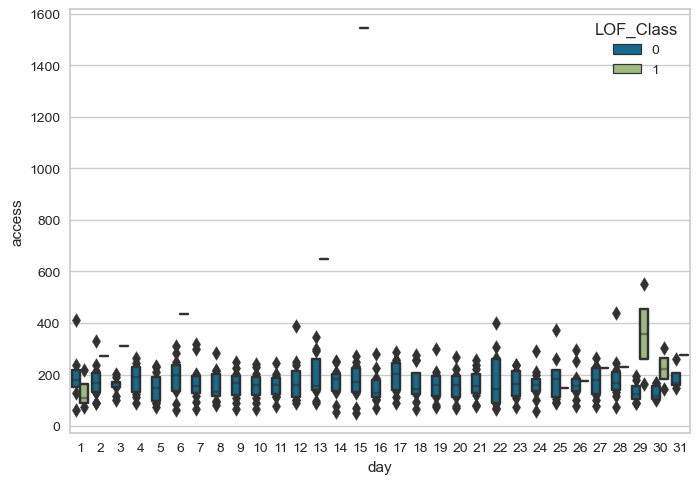

In [57]:
# Data viz per day
sns.boxenplot(data=lof_results, y='access', x='day', hue='LOF_Class')

<AxesSubplot:xlabel='week_day', ylabel='access'>

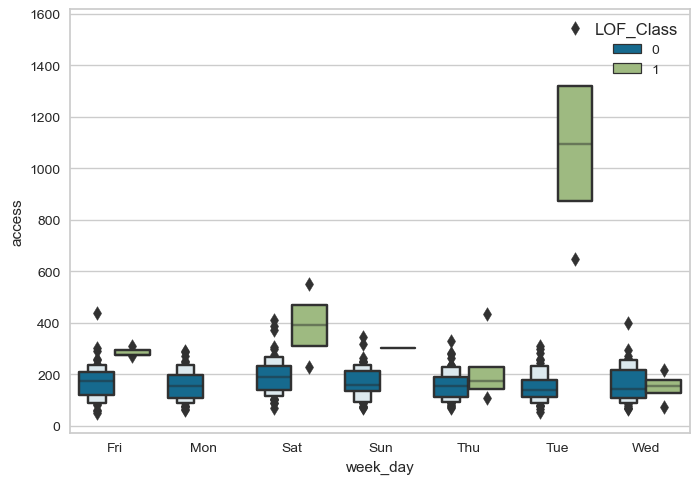

In [58]:
# Data viz per week day
sns.boxenplot(data=lof_results, y='access', x='week_day', hue='LOF_Class')

<AxesSubplot:xlabel='month', ylabel='access'>

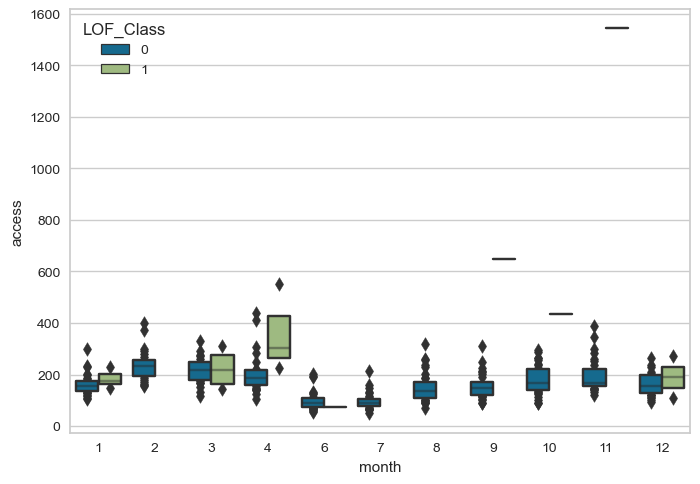

In [59]:
# Data viz per month
sns.boxenplot(data=lof_results, y='access', x='month', hue='LOF_Class')

In [60]:
plot_model(lof, plot = 'tsne', feature = 'day')

In [61]:
data_concat = pd.concat([hist_results, iforest_results, knn_results, lof_results]).sort_values(by='date')
data_concat.head(1)

date  access  day  month  year week_day  Hist_Class  Hist_Score  \
0 2022-06-01      74    1      6  2022      Wed         0.0    -6.21426   

   iforest_Class  iforest_Score  KNN_Class  KNN_Score  LOF_Class  LOF_Score  
0            NaN            NaN        NaN        NaN        NaN        NaN